# Computer Vision - Assignment 1 - Convolution and Derivatives

#### 10 (+3) points   |   Due date: October 28, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Ignacio Garach Vélez</mark>

The goal of this assignment is to learn how to use OpenCV to implement convolution-based image filtering techniques. 


---


## Normas de entrega

Para este trabajo, al igual que para los demás, se deben presentar  las valoraciones y decisiones adoptadas en cada uno de los apartados. También deberá incluirse una valoración sobre la calidad de los resultados obtenidos. Se recuerda que código sin informe explicativo no puntúa.

Este trabajo de implementación tiene como objetivo principal aprender a implementar filtros de convolución y, particularmente, el cálculo de las derivadas de una imagen. El documento pdf sobre Gaussian discretization disponible en PRADO (https://pradogrado2223.ugr.es/pluginfile.php/209014/mod_folder/content/0/Bibliografia/Gaussian_discretization.pdf) puede resultar de gran utilidad para la implementación del ejercicio 1.A.

Normas de entrega (EL INCUMPLIMIENTO DE ESTAS NORMAS SIGNIFICA PÉRDIDA DIRECTA DE 1 PUNTO CADA VEZ QUE SE DETECTE UN INCUMPLIMIENTO):

1. El diseño de celdas del documento debe ser respetado.
2. Solo se entregará el código fuente (fichero .ipynb) y no se enviarán las imágenes empleadas.
3. Los path que se usen en la lectura de imágenes o cualquier otro fichero de entrada debe ser siempre “/content/drive/My Drive/images/nombre_fichero”
4. El código deberá  presentarse con los resultados obtenidos en cada apartado junto con los  correspondientes comentarios y valoraciones.  Recuerde que la entrega de código sin informe explicativo o valoraciones no puntúa.

Comenzamos cargando nuestra unidad personal de Drive así como el módulo con las funciones implementadas en la P0 que necesitaremos utilizar en esta. 

---

In [1]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# change directory
%cd '/content/drive/MyDrive'
#  the current directory
%pwd
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images', route)

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import sys,os
# Let's import the python module P0. 
# You must create the directory CV and put inside the file P0.py
# P0.py is the module created from your notebook P0.
path_to_module='/content/drive/My Drive/CV/'
sys.path.append(os.path.abspath(path_to_module))

import P0

In [3]:
# We import the modules to use
import cv2, numpy as np, math
from matplotlib import pyplot as plt
# This allows to display images  and to save  them in cells
%matplotlib inline
plt.rcParams["figure.figsize"] = (9, 9) #Ajusto el tamaño de salida de figuras para poder verlas bien.

# **Exercise-1**: Write Python code to implement the following tasks efficiently (4 points). 




## A)

Compute discrete masks of the 1D Gaussian and its normalized first and second derivatives. Consider both the size of the mask and the sigma value as possible inputs. Use the sigma values {1, 2.3, 3.7,5} and size masks {7,11,15} as inputs, and draw the mask values as 1D graphs using matplotlib. (1.5 points)

El comienzo de la función debe comprobar que parámetros se han pasado para poder calcular los restantes que serán necesarios para llevar a cabo la discretización. 

Exponemos brevemente el significado:

---


  σ = Desviación típica de la gaussiana con respecto a su media

---


  k = Amplitud hacia cada lado del dominio centrado en 0 en el que se va a discretizar

---


  sizeMask = Tamaño de la máscara, se puede calcular a partir de k como sizeMask = 2k+1, el doble de la amplitud junto al cero


---


Para hacer la transformación se ha de tener en cuenta que debido a las propiedades de la Gaussiana tomando un k que sea mayor que 3 veces sigma se muestrea más de un 98 por ciento de la Gaussiana.

Por último, dependiendo del orden que se pida, devolvermos la función correspondiente aplicada en los puntos escogidos.

Para el caso de la gaussiana sin derivar, imponemos un escalado que haga que la suma de los valores de la función en los 2k+1 puntos sea 1.

---

En el caso de las derivadas esto no es necesario, la derivada de una función constante debe devolver 0 en su conjunto (salvo redondeos).

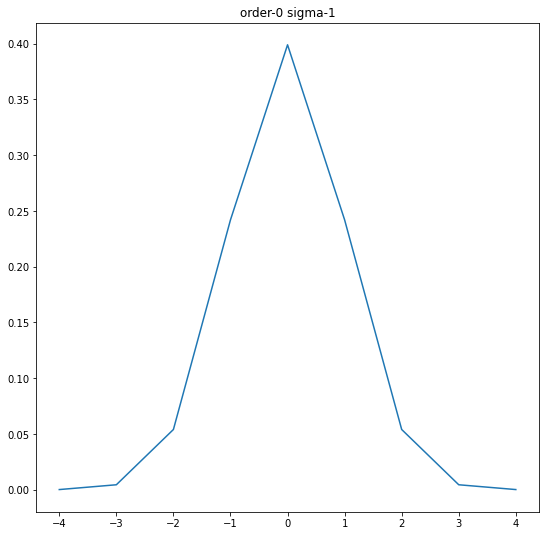

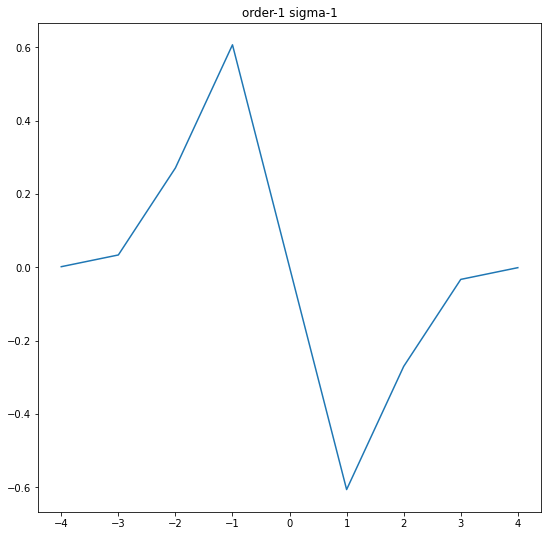

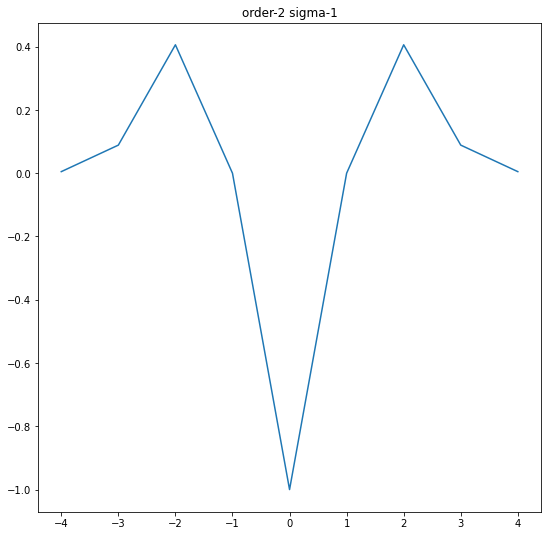

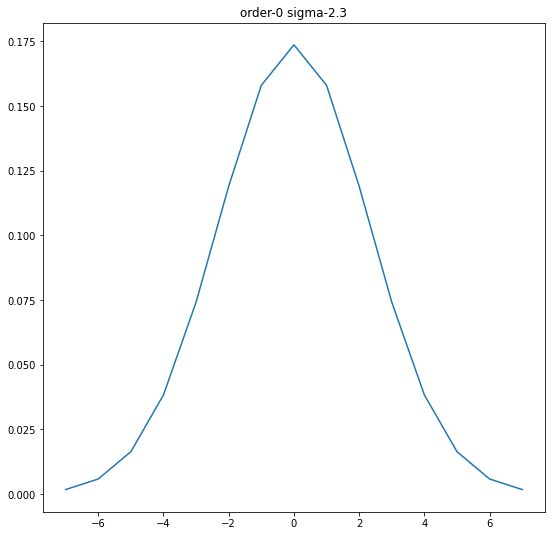

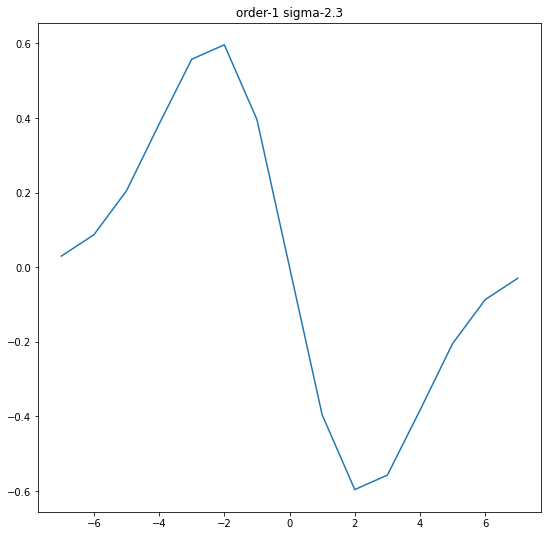

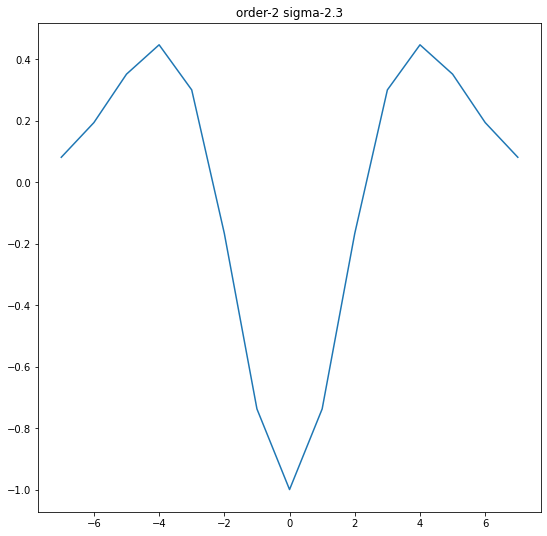

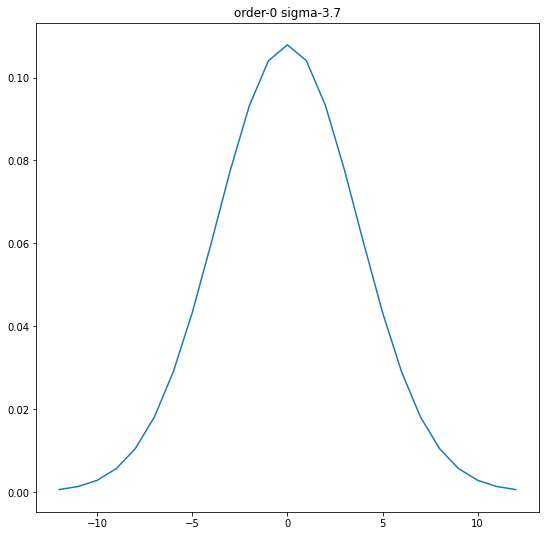

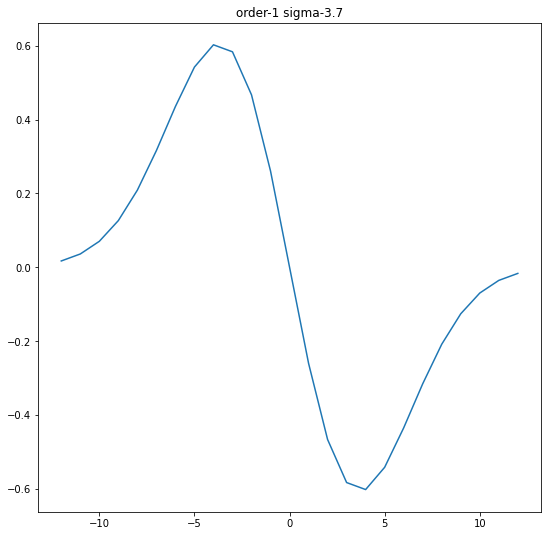

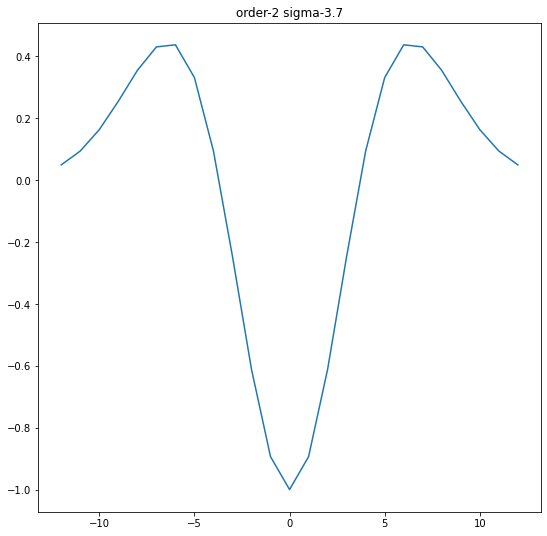

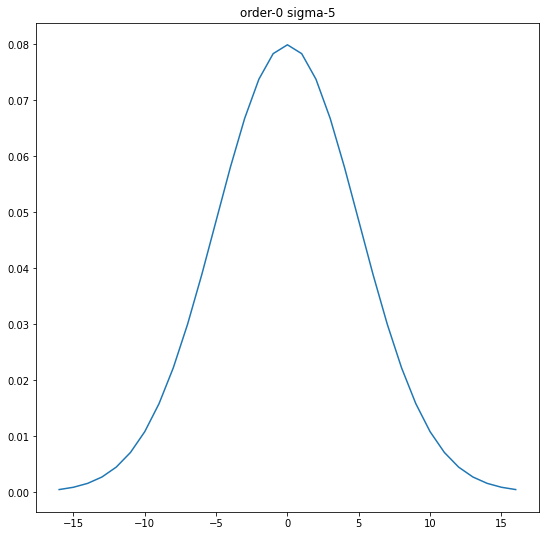

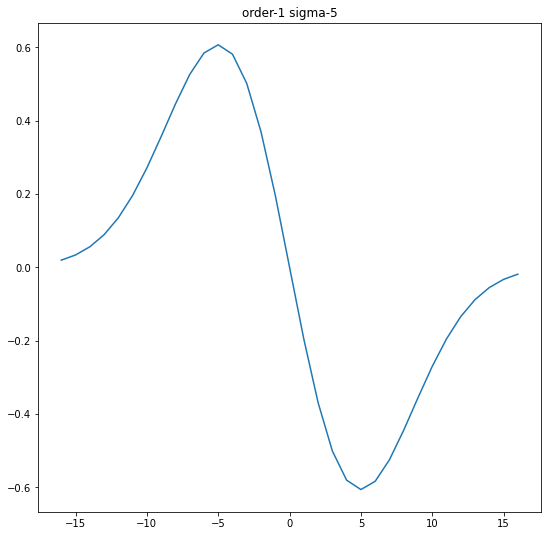

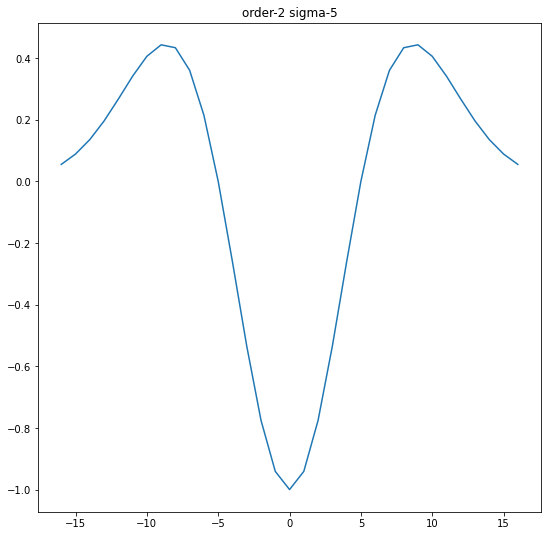

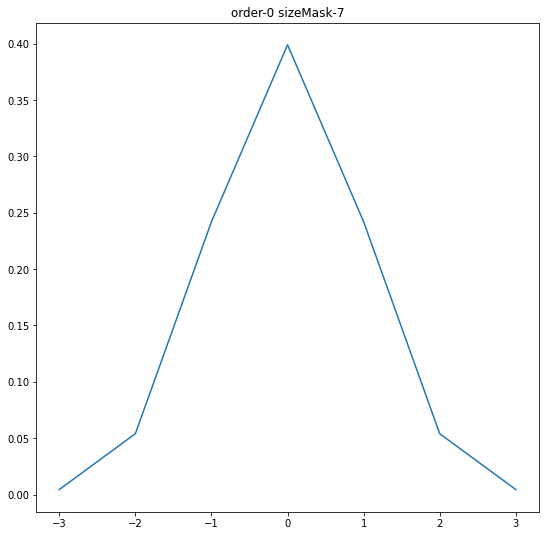

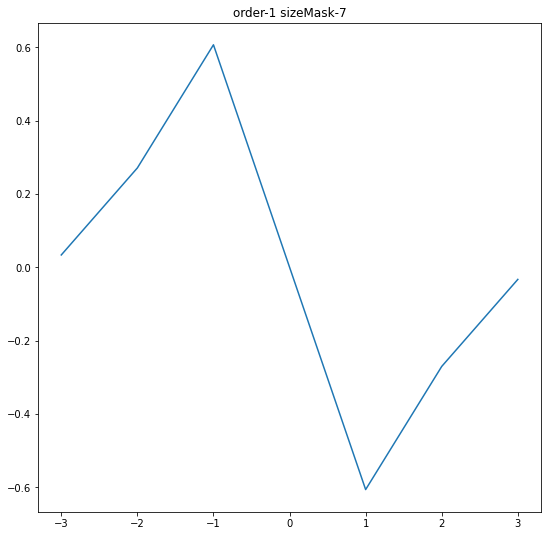

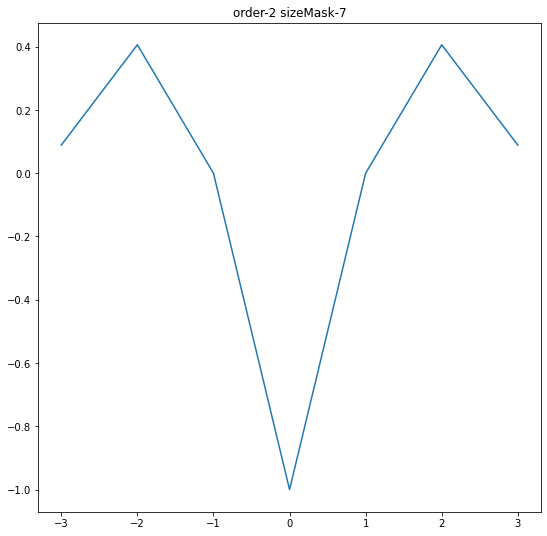

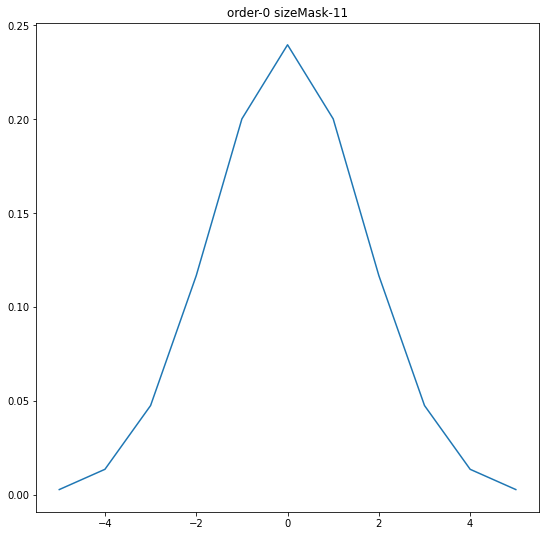

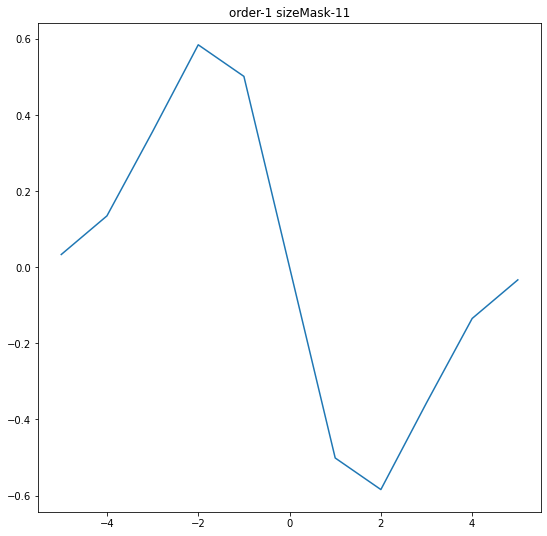

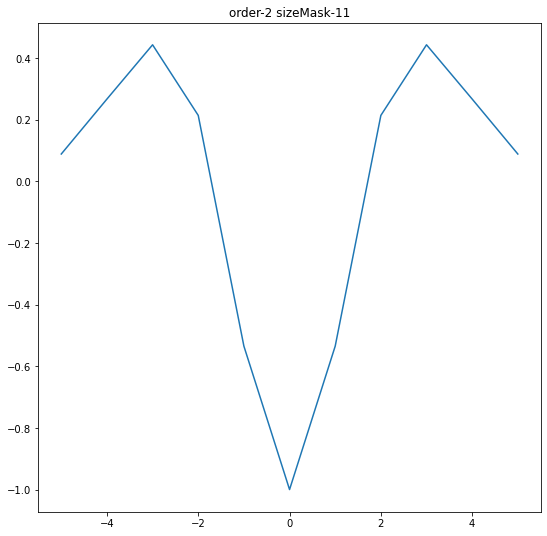

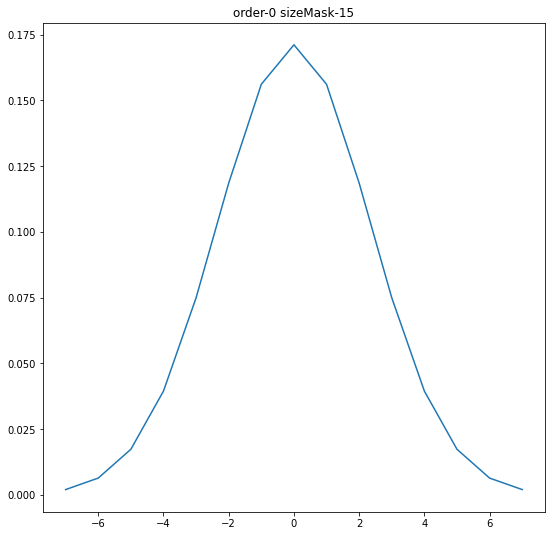

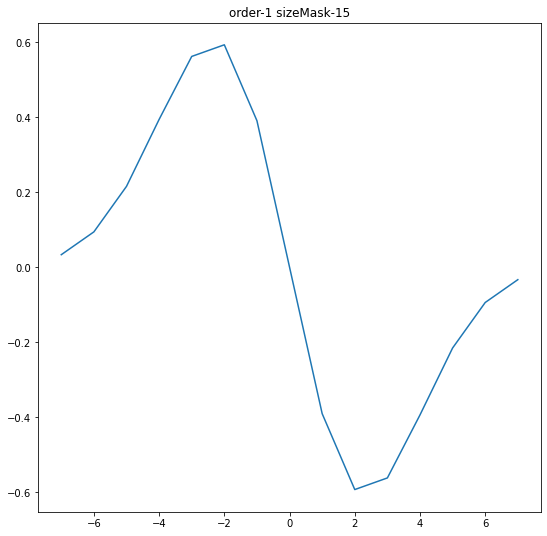

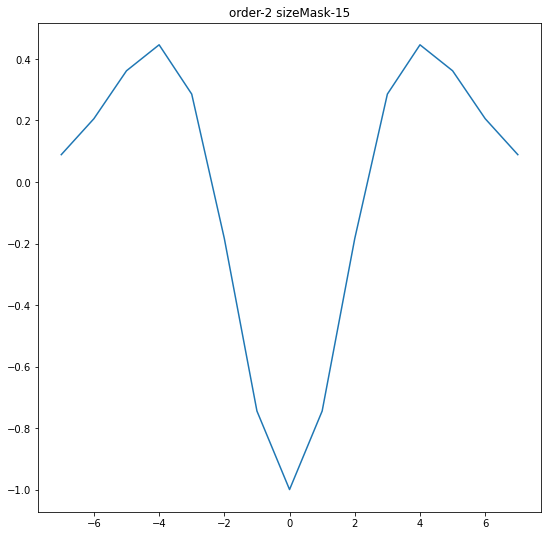

In [4]:
def gaussianMask1D(sigma=0, sizeMask=0, order=0):
  #calcular el otro sigma o mask
  if sigma > 0:
    k = int(sigma*3+1)
  else:
    if sizeMask > 0:
      k = (sizeMask - 1)/2
      sigma = k/3.0

  if order==0:
    mask = [np.exp(-x*x/(2*sigma*sigma)) for x in np.arange(-k, k+1, 1)]
    mask = mask / np.sum(mask)
  if order==1:
    mask = [np.exp(-x*x/(2*sigma*sigma))* (-x/sigma) for x in np.arange(-k, k+1, 1)]
  if order==2:
    mask = [np.exp(-x*x/(2*sigma*sigma))* (x**2/sigma**2 - 1) for x in np.arange(-k, k+1, 1)]

  return np.array(mask)


def plotGraph(graph, title='No title'):
  k = (len(graph)-1)/2
  plt.plot(np.arange(-k, k+1, 1), list(graph))
  plt.title(title)
  plt.show()

# Let's check the functions
# You must experiment with different values for sigma and sizeMask
# Write down your conclusions 
sigma=[1, 2.3, 3.7, 5]
sms = [7,11,15]

for s in sigma:
  plotGraph(gaussianMask1D(s, sizeMask=0, order=0),title='order-0 sigma-'+str(s))
  plotGraph(gaussianMask1D(s, sizeMask=0, order=1), title='order-1 sigma-'+str(s))
  plotGraph(gaussianMask1D(s, sizeMask=0, order=2), title='order-2 sigma-'+str(s))

for sm in sms:
  plotGraph(gaussianMask1D(sigma=0, sizeMask=sm, order=0),title='order-0 sizeMask-'+str(sm))
  plotGraph(gaussianMask1D(sigma=0, sizeMask=sm, order=1), title='order-1 sizeMask-'+str(sm))
  plotGraph(gaussianMask1D(sigma=0, sizeMask=sm, order=2), title='order-2 sizeMask-'+str(sm))

Como era de esperar, conforme aumentamos el parámetro sigma o el tamaño de la máscara, la discretización evalua la función en más valores y se va suavizando la forma de la función gaussiana y sus derivadas cuando las graficamos

## B)




Read an image in gray level. Smooth it applying the convolution with masks defined by a set of increasing sigma values, i.e. sigma= 0.8,1.5,3,6,12. Display all smoothed images in the same canvas. Use the OpenCV’s function `sepFilter2D()` with masks computed using your functions from (A). (1.5 points)



---


Ahora debemos implementar la convolución bidimensional, para ello vamos a hacer uso de la propiedad de separabilidad que en este caso se cumple, podemos aplicar máscaras 1D por filas y columnas y conseguiremos un efecto equivalente a aplicar la máscara 2D correspondiente.

Haremos uso de la función de opencv sepFilter2D() a la que pasamos la imagen y las máscaras del primer ejercicio.

Se implementan ordenes de derivación para el alisado ([0, 0]) y para derivadas de primer y segundo orden en cada uno de los ejes.

---
Como comentario técnico se ha utilizado ddepth=cv2.CV_64F en lugar de -1
en sepFilter2D(). Esto, si la imagen de entrada es uint8, conserva los
valores negativos y muestra una visualización algo más clara.


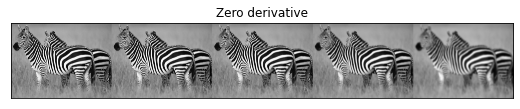

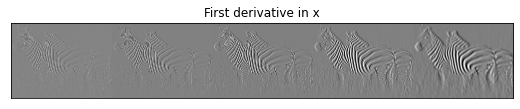

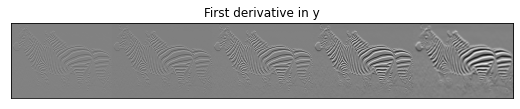

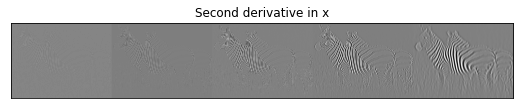

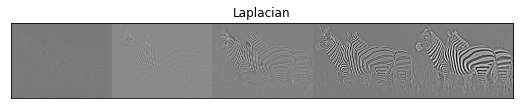

In [5]:
def my2DConv(im, sigma, orders):
  if orders==[0, 0]:
    return cv2.sepFilter2D(im, ddepth=cv2.CV_64F, kernelX=gaussianMask1D(sigma=sigma, order=0), kernelY=gaussianMask1D(sigma=sigma, order=0))
  elif orders==[1, 0]:
    return cv2.sepFilter2D(im, ddepth=cv2.CV_64F, kernelX=gaussianMask1D(sigma=sigma, order=1), kernelY=gaussianMask1D(sigma=sigma, order=0))
  elif orders==[0, 1]:
    return cv2.sepFilter2D(im, ddepth=cv2.CV_64F, kernelX=gaussianMask1D(sigma=sigma, order=0), kernelY=gaussianMask1D(sigma=sigma, order=1))
  elif orders==[2,0]:
    return cv2.sepFilter2D(im, ddepth=cv2.CV_64F, kernelX=gaussianMask1D(sigma=sigma, order=2), kernelY=gaussianMask1D(sigma=sigma, order=0))
  elif orders==[0, 2]:
    return cv2.sepFilter2D(im, ddepth=cv2.CV_64F, kernelX=gaussianMask1D(sigma=sigma, order=0), kernelY=gaussianMask1D(sigma=sigma, order=2))
  elif orders==[2, 2]:
    return sigma**2*(my2DConv(im, sigma, [2, 0])+my2DConv(im, sigma, [0, 2]))
  else:
    ('error in order of derivative')

a = get_image('zebra.jpg')
im = P0.readIm(a, 0)
vim0=[]
orders=[0, 0]
for sigma in [0.8,1.5,3,6,12]:
  vim0.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))
orders=[1, 0]
vim10=[]
for sigma in [0.8,1.5,3,6,12]:
  vim10.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))
orders=[0, 1]
vim01=[]
for sigma in [0.8,1.5,3,6,12]:
  vim01.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))
orders=[2, 0]
vim20=[]
for sigma in [0.8,1.5,3,6,12]:
  vim20.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))
orders=[0, 2]
vim02=[]
for sigma in [0.8,1.5,3,6,12]:
  vim02.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))
orders=[2, 2]
vimL=[]
for sigma in [0.8,1.5,3,6,12]:
  vimL.append(P0.rangeDisplay01(my2DConv(im, sigma, orders), flag_GLOBAL=0))


P0.displayMI_ES(vim0,'Zero derivative', ixf=5)
P0.displayMI_ES(vim10,'First derivative in x', ixf=5)
P0.displayMI_ES(vim01,'First derivative in y', ixf=5)
P0.displayMI_ES(vim20,'Second derivative in x', ixf=5)
P0.displayMI_ES(vimL, 'Laplacian', ixf=5)

Como se puede observar en los resultados, el alisamiento gaussiano constituye un filtro paso baja, es decir, suaviza o amortigua las frecuencias altas y mantiene las bajas.

---

De otra forma, las derivadas ejercen el efecto contrario, actuan de filtro paso alta, resaltando de forma clara las altas frecuencias o cambios de intensidad, en nuestro caso los cambios de la piel de la cebra. Es muy interesante observar como si aplicamos el kernel de derivada por filas o columnas, se resaltan claramente los cambios horizontales o verticales en la piel de la cebra

## C)	

Use the OpenCV’s function `sepFilter2D()` to compute the gradient and Laplacian images using your masks from (A). Display all results in the same canvas. (1 point)

En este ejercicio se pide calcular otras funciones derivadas o relacionadas con ellas.

---



El gradiente no es más que calcular el módulo del vector resultado de aplicar la convolución derivada primera en cada componente. La interpretación del mismo es la búsqueda de los cambios de frecuencia en ambas direcciones y modulada para estimar los cambios en todas las direcciones de la imagen.

$$|∇(I)| = \sqrt{(\frac{∂I}{∂x})^2+(\frac{∂I}{∂y})^2} $$

---


La orientación trata de representar la dirección del mayor cambio de intensidad local en cada píxel.

$$θ = atan2(\frac{∂I}{∂y}, \frac{∂I}{∂x})$$

---

El operador laplaciano es la traza del hessiano, es decir de la matriz de derivadas segundas de la imagen pero normalizada por sigma. Trata de detectar los bordes de la imagen con mayor precisión, al usar segundas derivadas:

$$L(g) = \sigma^2(\frac{∂^2g}{∂x^2}+\frac{∂^2g}{∂y^2}) $$

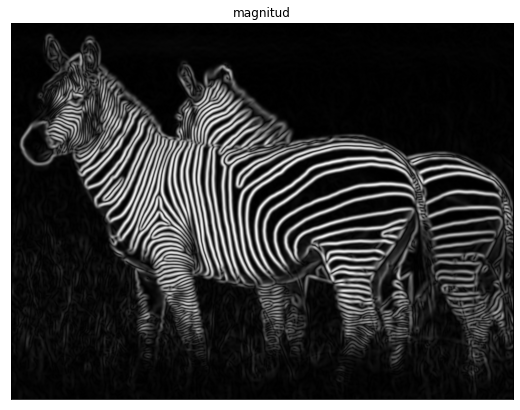

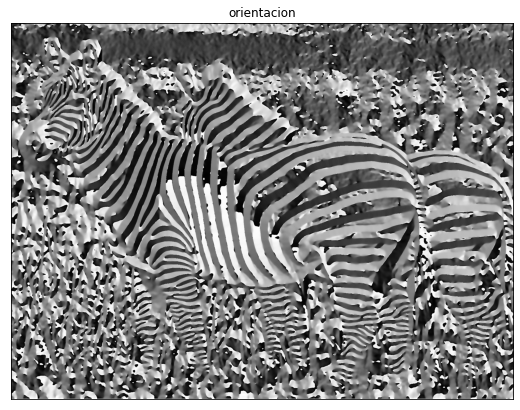

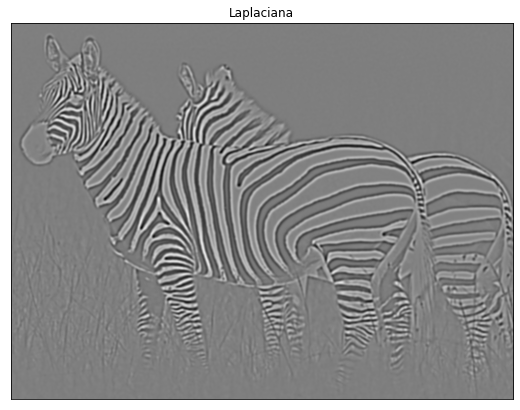

In [6]:
def gradientIM(im,sigma):
  dx = my2DConv(im, sigma, [1, 0])  
  dy = my2DConv(im, sigma, [0, 1])
  return dx,dy

def laplacianG(im,sigma):
  return my2DConv(im, sigma, [2, 2])
  

sigma=5
a = get_image('zebra.jpg')
image = P0.readIm(a, 0)
#
# The computation must be done in floating point !!!
im=np.array(image,np.float64)

dx,dy=gradientIM(im, sigma)
mag= np.sqrt(dx**2+dy**2)
P0.displayIm(mag,'magnitud')

orient=np.arctan2(dy, dx)
P0.displayIm(orient,'orientacion')
lap = laplacianG(im, sigma)
P0.displayIm(laplacianG(im, sigma),'Laplaciana')

# **Exercise-2**:  Using your functions from  previous exercises, write Python functions and show results for the following tasks (6 points).





## A) 

Build up a 4-level Gaussian pyramid for an image using Gaussian masks of size 7x7.  Display all levels  in the same canvas.  (2 points)

Dividimos el trabajo en 3 funciones, la primera simplemente recupera el sigma a partir del tamaño de máscara con el mismo criterio que en el ejercicio 1.
Por otro lado en pyramidGauss() es donde se genera el vector de imágenes con las que corresponden a la pirámide, finalmente en displayPyramid() se adecuan todas las imágenes para su visualización conjunta, rellenando los huecos que sobran para poder usar las funciones stack y concat.

La función principal pyramidGauss() va iterativamente hasta el nivel deseado, calculando la convolución de alisamiento, haciendo subsampling a la imagen y guardando los resultados de cada nivel en el vector.

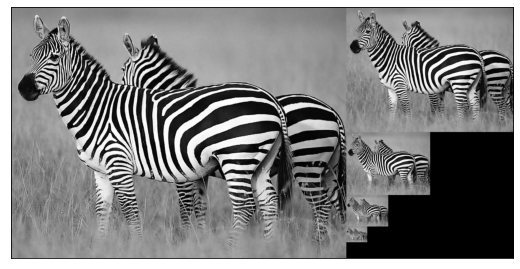

In [7]:
def sizetoSigma(sizemask):  #Recuperamos la conversión de tamaño de máscara a sigma que se incluía en otra función
  k = (sizemask - 1)/2
  sigma = k/3.0
  return sigma
    
def pyramidGauss(im,sizeMask=7, nlevel=4):
  sigma = sizetoSigma(sizeMask)                               #Calculamos la desviación con la función
  vim = [im]
  alisar = gaussianMask1D(0, sizeMask, 0)                     #Preparamos la máscara de alisamiento
  for i in range(nlevel):
    im = cv2.sepFilter2D(im, -1, alisar, alisar)[::2, ::2]    #En cada nivel vamos aplicando alisamiento gaussiano y reduciendo el tamaño haciendo subsampling
    vim.append(im)
  return vim                                                  #Devolvemos el vector con las imágenes de la pirámide
  
a = get_image('zebra.jpg')
im = P0.readIm(a, 0)
pyrG = pyramidGauss(im,sizeMask=7, nlevel=4)

def displayPyramid(vim, title='Gaussian Pyramid'):
  maxwidth = vim[1].shape[1]                                  #Calculamos las dimensiones que tendrá el canvas completo
  maxheight = vim[0].shape[0]
  black = np.zeros(len(vim[-1].shape))                        #Generamos el color de relleno para los huecos
  resto = [vim[1]]                                            #Empezamos a definir la parte derecha de la imagen con la segunda imagen de la pirámide
  for i in vim[2:]:
    resto.append(cv2.copyMakeBorder(i, 0, 0, 0,maxwidth-i.shape[1], cv2.BORDER_CONSTANT, value=black))      #Para el resto rellenamos el hueco que falta calculandolo respecto a los máximos
  resto = cv2.vconcat(resto)                                                                                #Concatenamos la columna de la parte derecha
  resto = cv2.copyMakeBorder(resto, 0, maxheight-resto.shape[0], 0, 0, cv2.BORDER_CONSTANT, value=black)    #Rellenamos el hueco hacia abajo con respecto a la primera imagen
  P0.displayIm(np.hstack((vim[0], resto)))

displayPyramid(pyrG)


Observemos que en cada nivel el tamaño de la imagen se ve reducido a un cuarto del anterior. A costa de esto estamos perdiendo información, pero obtenemos distintos resúmenes estructurales de la imagen a distinto tamaño.

La forma de mostrarlas sin embargo, hace que nuestro ojo por su capacidad de visión no note el emborronamiento en los últimos niveles por ser más pequeños respecto a los primeros.

## B)

Using your code from A), implement a function to build a 4-level Laplacian pyramid.  The type of interpolation employed is now relevant. Show two examples using the images provided. Show all levels on the same canvas. (2 points) 

Para construir la pirámide laplaciana necesitamos calcular previamente la pirámide gaussiana mediante la función del ejercicio anterior pues la calcularemos en base a la misma.

---

Cada nivel se calcula a partir del mismo nivel de la gaussiana al que se le resta la expansión al mismo tamaño del siguiente nivel de la gaussiana. Esta expansión puede ser todo lo "buena" que queramos intentar, simplemente el píxel de al lado o usar interpolación de cualquier tipo.

El último nivel se fija como el último de la gaussiana para poder llevar a cabo la reconstrucción posterior.

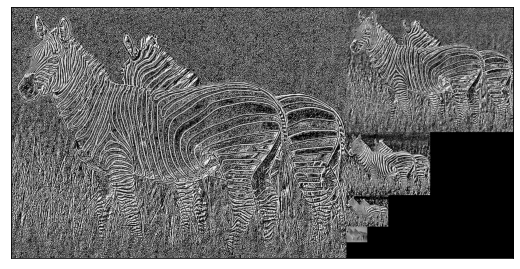

In [8]:
def pyramidLap(im, sizeMask,nlevel=4,flagInterp=cv2.INTER_LINEAR):
  vim = pyramidGauss(im, sizeMask, nlevel)                                                                    #Calculamos la pirámide gaussiana
  vimL = []
  for i in range(0, len(vim)-1):                                                                              
    vimL.append(vim[i] - cv2.resize(vim[i+1], (vim[i].shape[1], vim[i].shape[0]), interpolation=flagInterp))  #En cada nivel, tomamos el mismo de la gaussiana y le restamos el siguiente expandido con interpolación lineal
  vimL.append(vim[nlevel])                                                                                    #El último nivel es el de la gaussiana

  return vimL


im=cv2.imread(get_image('zebra.jpg'),0)
pyrL = pyramidLap(im, sizeMask=7, nlevel=4)
displayPyramid(pyrL,'Laplacian Pyramid')


En esta pirámide podemos observar que, salvo en el último nivel, lo que recoge la laplaciana son las altas frecuencias a mayor detalle por el uso de la derivada segunda. Los detalles profundos de la imagen.

## C) 

Implement a function to reconstruct the image encoded in the Laplacian pyramid. Take one of the pyramids from B) and verify that it is possible to obtain an exact copy of the original image. To do this, calculate the Frobenius norm of the difference between the original and the reconstructed images.(2 points)

Como hemos explicado anteriormente, la generación de la pirámide laplaciana es un proceso reversible de forma exacta, basta deshacer los cambios a partir del último nivel de la gaussiana, procedemos de esta manera y comprobamos que coinciden pixel a pixel:

---

Para la exactitud es crucial que el método de interpolación sea el mismo que se uso en la construcción de la pirámide en el upsampling.

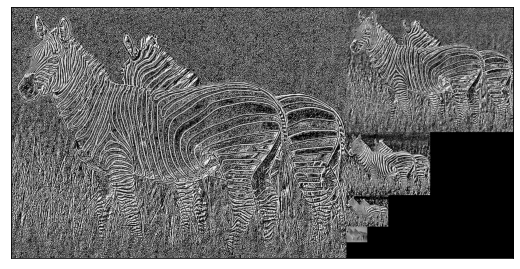

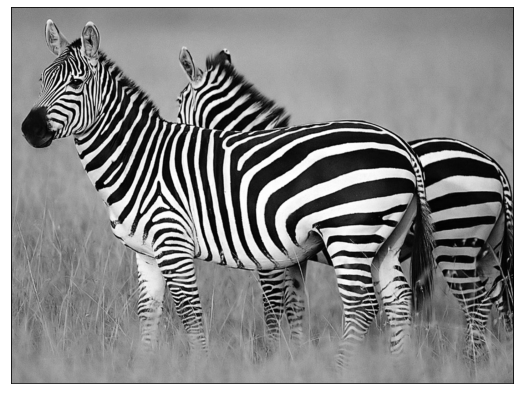

Error per pixel 0.0


In [9]:
def reconstructIm(pyL,flagInterp):
  inverse = list(reversed(pyL))                                                                                        #Invertimos la laplaciana para iterar más comodamente 
  aux = inverse[0]                                                                                                  
  for i in range(0, len(pyL)-1):  
    aux = inverse[i+1] + cv2.resize(aux, (inverse[i+1].shape[1], inverse[i+1].shape[0]), interpolation=flagInterp)     #A partir del ultimo nivel vamos calculando la suma del penúltimo y la reducción a su tamaño del último

  return aux

im=cv2.imread(get_image('zebra.jpg'),0)
pyrL = pyramidLap(im,sizeMask=7, nlevel=4)

displayPyramid(pyrL)
recons=reconstructIm(pyrL,cv2.INTER_LINEAR)
P0.displayIm(recons)
print('Error per pixel',np.sqrt(np.linalg.norm(im-recons, ord=2))/np.prod(im.shape))                                  #Observamos que la reproducción de la imagen original es exacta calculando su norma
# The final error must be 0.0

# **BONUS: HYBRID IMAGES** (3 points)

This bonus section is based on the following paper about hybrid imaging: SIGGRAPH 2006 paper by Oliva, Torralba, and Schyns (https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf).  

 The goal of this bonus is to learn how the human visual system extracts information about an object depending on the distance. To do this, we construct a hybrid image from two images of different objects. By appropriately mixing part of the high frequencies of one image with part of the low frequencies of another image, we obtain a hybrid image that shows different perceptions with distance.  The smoothing of both images is the key aspect to select the high and low frequency range of each image.  The higher the sigma value, the greater the removal of high frequencies from the image. It is recommendable to choose this value separately for each of the images (see recommendations given in the article by Oliva et al.) and, in fact, more than one value may be possible. Steps to follow: 
 
1. Read the paper. 

2. Find the appropriate sigma values for each pair of images. Extract the low and high frequency images and calculate the hybrid image as the average of them. (Hint: the low frequencies must be really low).

3. Test at least two pairs of the provided ones. (Hint: Try gray level images first).

4. Use your visualization functions to display the Gaussian pyramid of the hybrid images. Explain the visual effect perceived. 

La idea del paper, en resumen, es obtener la imagen híbrida mezclando una parte de las frecuencias altas de una imagen con otra parte de las frecuencias bajas de otra imagen. De esta forma el resultado admite distintas interpretaciones (una imagen o la otra) a distintas distancias. Esto es posible debido a las características de detección de camios de frecuencias de la visión humana.

---

Esto se puede implementar con una aproximación bastante simple, la siguiente función recible 2 imágenes, una que se tratará como parte de frecuencia baja y otra de alta. Para ello a la primera se le aplicará un alisamiento fuerte y a la segunda se le restará su versión emborronada para mantener sólo las altas frecuencias. La elección de las desviaciones típicas debe hacerse con cuidado para tratar de mantener el efecto.

Las frecuencias bajas predominan a largas distancias mientras que las altas lo hacen a corta distancia. Es en parte por ello, que se suele elegir aquellas imágenes con mayores detalles y bordes para usarlas en la alta frecuencia para el método

In [10]:
def hibridacion(im1, im2, hsigma, lsigma):
    # Aplicamos la convolución a cada imagen
    lf = my2DConv(im1, lsigma, [0, 0])
    hf = im2 - my2DConv(im2, hsigma, [0, 0])

    #Cálculo de la imagen promedio híbrida
    imagen_hibrida = (hf + lf)/2
    return [lf, hf, imagen_hibrida]
nlevel=5
sizeMask=7
plt.rcParams["figure.figsize"] = (12, 12)

La idea de visualizar mediante una pirámide gaussiana la hibridación es tener la noción de alejarse mirando los últimos niveles de la pirámide debiendo encontrar ahí la imagen de bajas frecuencias porque las altas se han moderado.

**Perro o gato:**
En este caso, la imagen del gato es más detallada y las altas frecuencias mantienen una gran noción de ella, luego es candidata para usarla de este modo. Testeando los valores de desviación se ha encontrado que con estos se logra el efecto

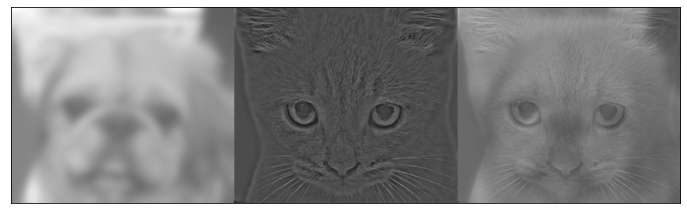

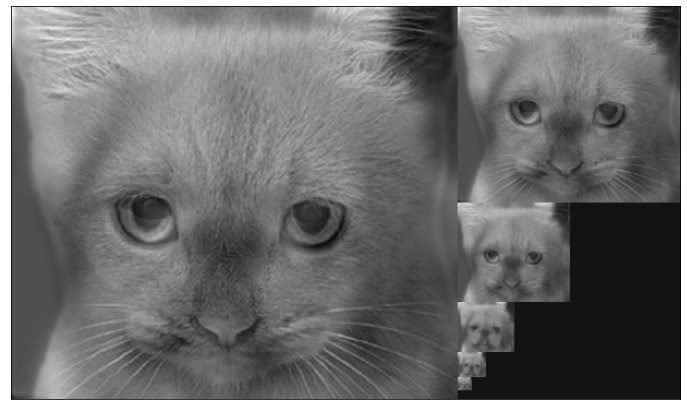

In [11]:
im1=cv2.imread(get_image('cat.bmp'),0)
im2=cv2.imread(get_image('dog.bmp'),0)
im=hibridacion(im2, im1, 6.0, 7.0)

P0.displayMI_ES(im)
vim = pyramidGauss(im[2],sizeMask, nlevel)
displayPyramid(vim)


**Marilyn o Albert:**
Para este par de imágenes es más complicado llevar a cabo la elección de que papel jugará cada una, ambas son bastante detalladas, sin embargo, trás probar de ambas formas, detalles como el bigote o la corbata hacen que sean mejor usar a Einstein para la alta frecuencia. Testeando los valores de desviación hemos encontrado estos, que observamos consiguen un efecto bastante bueno, con una desviación mucho más baja para las frecuencias bajas. Se puede observar como avanzando en los niveles se le van suavizando los rasgos faciales.

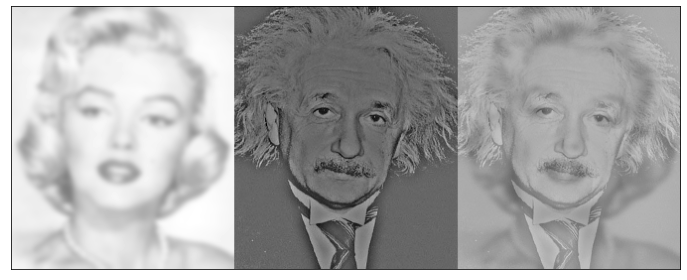

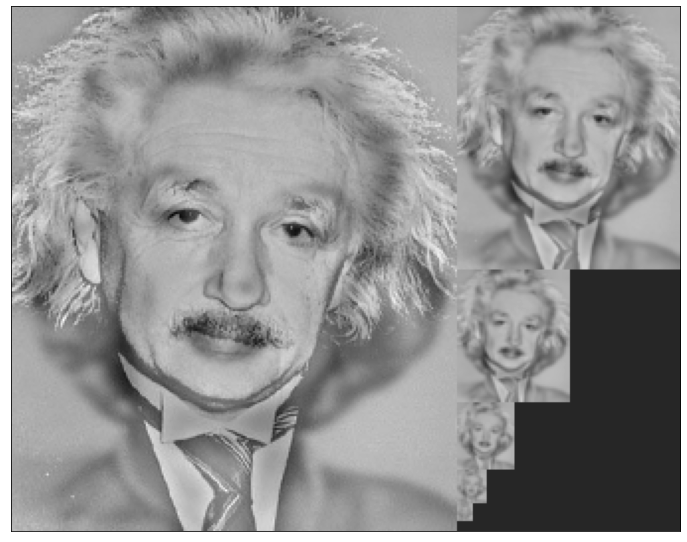

In [12]:
im1=cv2.imread(get_image('einstein.bmp'),0)
im2=cv2.imread(get_image('marilyn.bmp'),0)
im=hibridacion(im2, im1, 6.0, 2.5)

P0.displayMI_ES(im)
vim = pyramidGauss(im[2],sizeMask, nlevel)
displayPyramid(vim)

**Moto o bici:**
En este caso, la imagen de la bici no es tanto más detallada sino que tiene un hueco en comparación con la moto por lo que al difuminarse se logra en cierto modo el efecto porque al alejarse se ven menos los detalles de la bici y se intuye el extra de la moto que la bici no tiene en los niveles superiores de la pirámide.

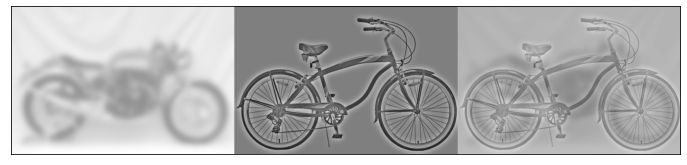

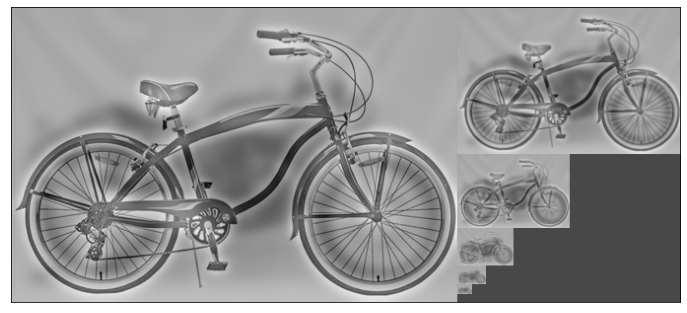

In [13]:
im1=cv2.imread(get_image('bicycle.bmp'),0)
im2=cv2.imread(get_image('motorcycle.bmp'),0)
im=hibridacion(im2, im1, 6.0, 6.0)

P0.displayMI_ES(im)
vim = pyramidGauss(im[2],sizeMask, nlevel)
displayPyramid(vim)

En el resto de imágenes se lleva a cabo un análisis y testeo de desviaciones similar, lograndose el efecto en mayor o menor medida.

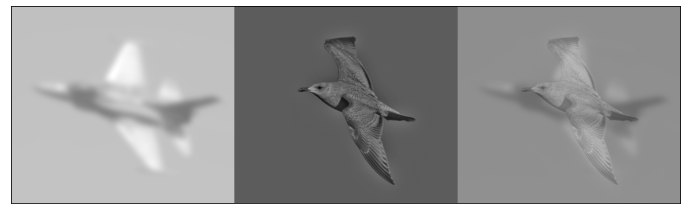

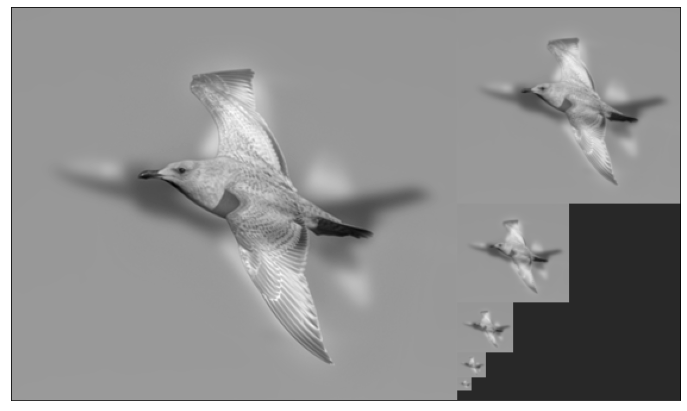

In [14]:
im1=cv2.imread(get_image('bird.bmp'),0)
im2=cv2.imread(get_image('plane.bmp'),0)
im=hibridacion(im2, im1, 12.0, 5.0)

P0.displayMI_ES(im)
vim = pyramidGauss(im[2],sizeMask, nlevel)
displayPyramid(vim)

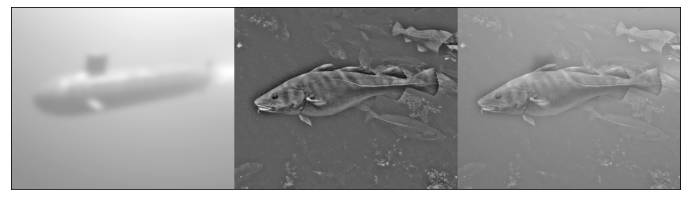

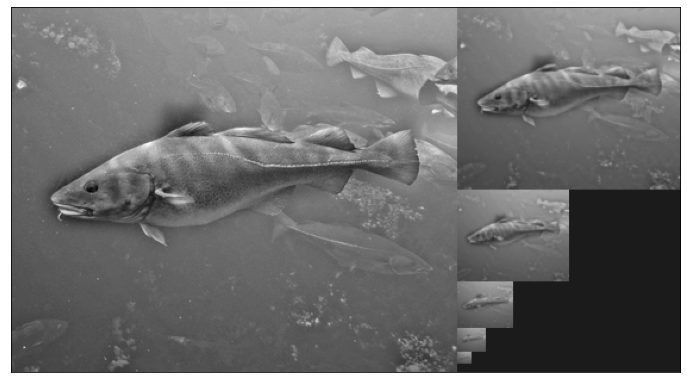

In [15]:
im1=cv2.imread(get_image('submarine.bmp'),0)
im2=cv2.imread(get_image('fish.bmp'),0)
im=hibridacion(im1, im2, 7.0, 5.0)

P0.displayMI_ES(im)
vim = pyramidGauss(im[2],sizeMask, nlevel)
displayPyramid(vim)